# Activity: Aggregations

## Introduction

In this activity you will practice using Pandas functionality to work with various aggregations.

This activity will cover the following topics:
- Measure an aggregate statistic over a specific column.
- Measure an aggregate statistic over a specific column of subsets using `groupby()` over one column.
- Measure multiple aggregate statistics over a specific column of subsets using `groupby()` over one column.
- Measure multiple aggregate statistics over a specific column of subsets using `groupby()` over multiple columns.
- Measure multiple aggregate statistics over a specific column of subsets using `groupby()` over multiple columns.
- Take the transpose of a DataFrame.


In [11]:
import pandas as pd

# Data from https://github.com/mwaskom/seaborn-data/blob/2b29313169bf8dfa77d8dc930f7bd3eba559a906/mpg.csv
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/2b29313169bf8dfa77d8dc930f7bd3eba559a906/mpg.csv")
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    str    
 8   name          398 non-null    str    
dtypes: float64(4), int64(3), str(2)
memory usage: 28.1 KB


In [12]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Data cleaning

In [13]:
## Review of missing values
df[df.isna().any(axis='columns')]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [14]:
## Dropping missing values
df = df.dropna()

#### Question 1

Assign the average of the `weight` column where the `origin` is `'usa'` to the variable `weight_usa`.

In [15]:

weight_usa = df[df["origin"] == "usa"]["weight"].mean()

#### Question 2

Assign the maximum of the `weight` column where the `origin` is `'japan'` to the variable `weight_japan`.

In [16]:
# Your code here

weight_japan = df[df["origin"] == "japan"]["weight"].max()

In [17]:
# Your code here

weight_japan = df[df["origin"] == "japan"]["weight"].max()

#### Question 3

Using Pandas' `groupby()` method, group by the `cylinders` column to find the minimum and maximum `horsepower` and assign the result to the variable `weight_by_cylinder`.

In [18]:
# Your code here

weight_by_cylinder = df.groupby("cylinders")["horsepower"].aggregate([min, max])

# Activity: Exploring with Visualizations

## Introduction

In this activity you will practice using Pandas functionality to create and
explore  visualizations.

This activity will cover the following topics:
- Compare single values against one another.
- Compare multiple values against one another.
- Use different methods to change how you see the data.


#### Question 1

Create a new column in the DataFrame `df` called `horsepower_per_cylinder`
that gives the value of `horsepower` per `cylinder`.

Then, create a scatter plot of `horsepower_per_cylinder` vs `acceleration` 
(`horsepower_per_cylinder` on the x-axis and `acceleration` on the y-axis).
Does `acceleration` tend to _increase_ or _decrease_ as `horsepower_per_cylinder`
_increases_?

Assign the boolean value `True` to the variable `acc_decreases` if `acceleration`
decreases as `horsepower_per_cylinder` increases. Otherswise, assign the boolean
value `False` to the variable `acc_decreases`.

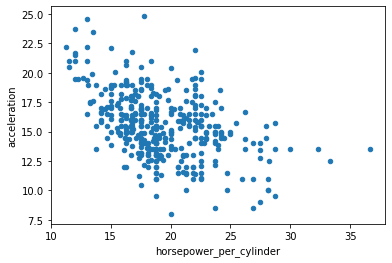

In [ ]:
# Your code here

df["horsepower_per_cylinder"] = df["horsepower"]/df["cylinders"]
df.plot.scatter(x="horsepower_per_cylinder", y="acceleration")
acc_decreases = True

#### Question 2

Create a single visualization where `horsepower_per_cylinder` and 
`horsepower` are on the y-axis vs `mpg` on the x-axis in a scatter plot.
Make each set of points a different color.

Set the result of the plot to the variable `ax`.
Your code will look something like:

```python
ax = # code to create a scatter plot
# ... other code
```

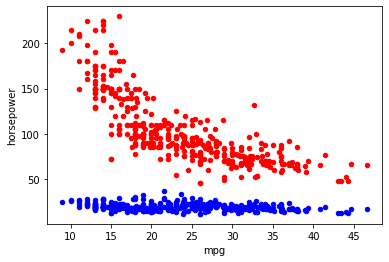

In [ ]:
# Your code here

ax = df.plot.scatter(y="horsepower_per_cylinder", x="mpg", color="blue")
ax = df.plot.scatter(y="horsepower", x="mpg", color="red", ax=ax)

#### Question 3

Create a histogram of the `mpg` column with the number ***50*** bins.
Change the x-axis of the visualization to ***'Miles Per Gallon'***

Set the result of the plot to the variable `ax`.
Your code will look something like:
```python
ax = # code to create a scatter plot
# ... other code
```

Text(0.5, 0, 'Miles Per Gallon')

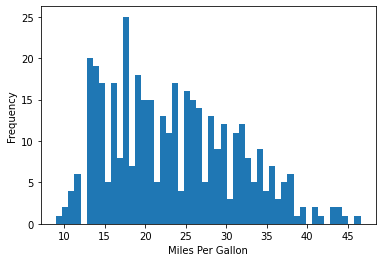

In [ ]:
# Your code here

ax = df["mpg"].plot.hist(bins=50)
ax.set_xlabel("Miles Per Gallon")


# Activity: Creating Visualizations

## Introduction

In this activity you will practice using Pandas functionality to create 
visualizations.

This activity will cover the following topics:
- Creating individual and multiple box plots in one visualization.
- Creating individual and multiple histograms in one visualization.
- Creating scatter plots.


#### Question 1

Create a box plot from `df` using Pandas. Assign the number of box plots that
are created in the visualization to the variable `n_box_plots`.

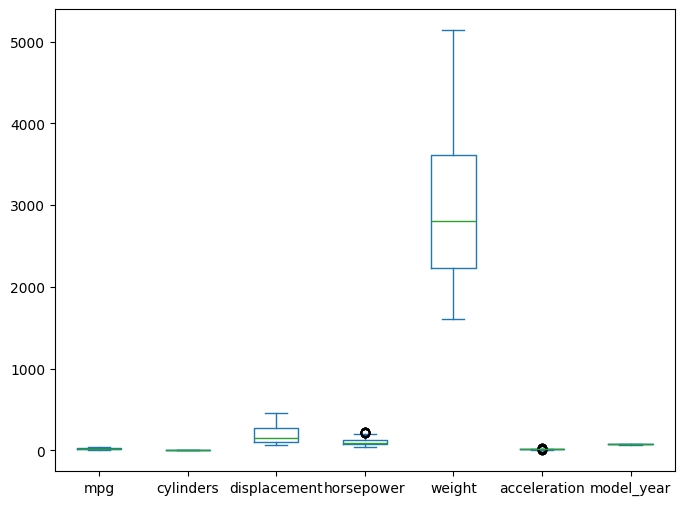

In [23]:
# Your code here
df.plot.box(figsize=(8,6))

n_box_plots = 7


#### Question 2

Using Pandas, create a visualization with box plots for the columns `cylinders`
& `model_year`. What is the smallest and largest number label on the axis
(representing values)?

Assign a best approximation of the smallest number label that is visible on the axis to the variable 
`smallest_label` and the largest number label to the variable `largest_label`. 

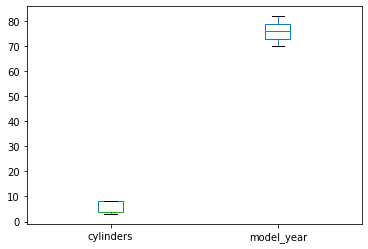

In [ ]:
# Your code here

df[['cylinders','model_year']].plot.box()
smallest_label = 0
largest_label = 80

#### Question 3

Using Pandas, create a visualization of a histogram for the `acceleration`
column.
What is the approximate number for the peak of this histogram?

Assign the approximate number for the peak to the variable `approx_peak_height`.

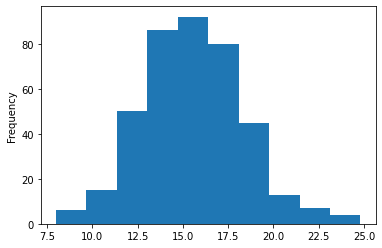

In [ ]:
# Your code here

df["acceleration"].plot.hist()
approx_peak_height = 85

#### Question 4

Using Pandas, create a scatter plot of `acceleration` vs `mpg` (`acceleration` 
on the x-axis and `mpg` y-axis).
What is the largest number label on the y-axis (representing `mpg`)?

Assign a best approximate for the largest number label on the `mpg` axis that is visible on the axis
to the variable `largest_mpg_label`. 

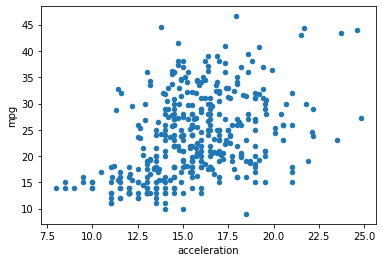

In [ ]:
# Your code here

df.plot.scatter(x='acceleration', y='mpg')
largest_mpg_label = 45